In [14]:
import pandas as pd

df = pd.read_csv("winequality-red.csv", sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1359 non-null   float64 
 1   volatile acidity      1359 non-null   float64 
 2   citric acid           1359 non-null   float64 
 3   residual sugar        1359 non-null   float64 
 4   chlorides             1359 non-null   float64 
 5   free sulfur dioxide   1359 non-null   float64 
 6   total sulfur dioxide  1359 non-null   float64 
 7   density               1359 non-null   float64 
 8   pH                    1359 non-null   float64 
 9   sulphates             1359 non-null   float64 
 10  alcohol               1359 non-null   float64 
 11  quality               1359 non-null   int64   
 12  quality_label         1359 non-null   object  
 13  alcohol_level         1358 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage

In [29]:

df.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:



df = df.drop_duplicates()




In [16]:

df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

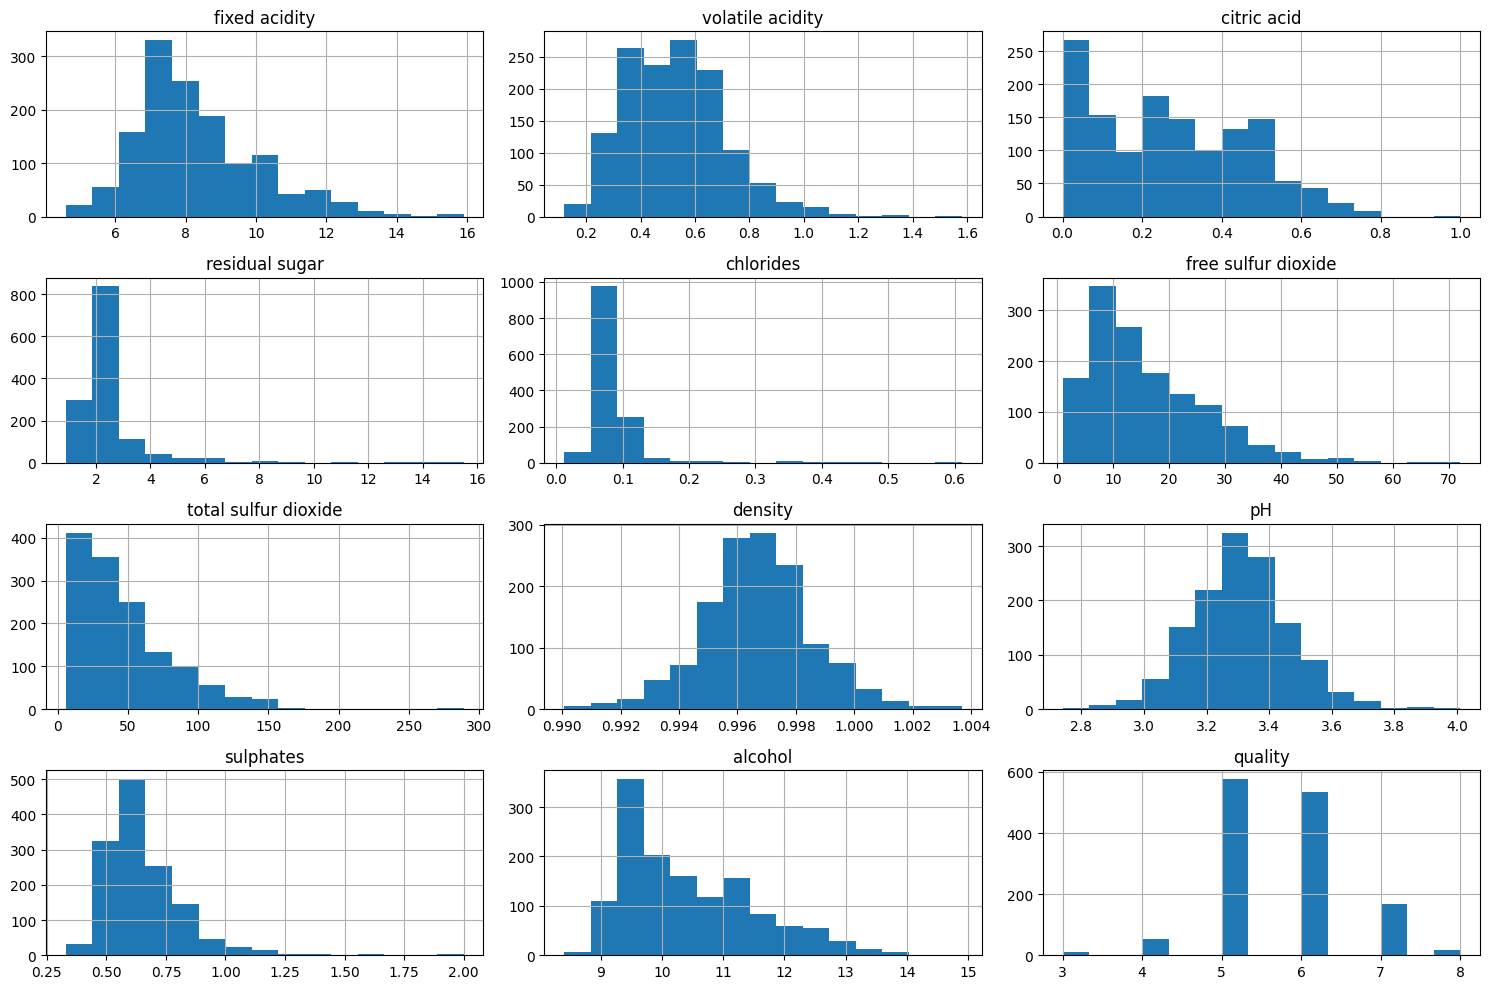

In [17]:
import matplotlib.pyplot as plt
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()


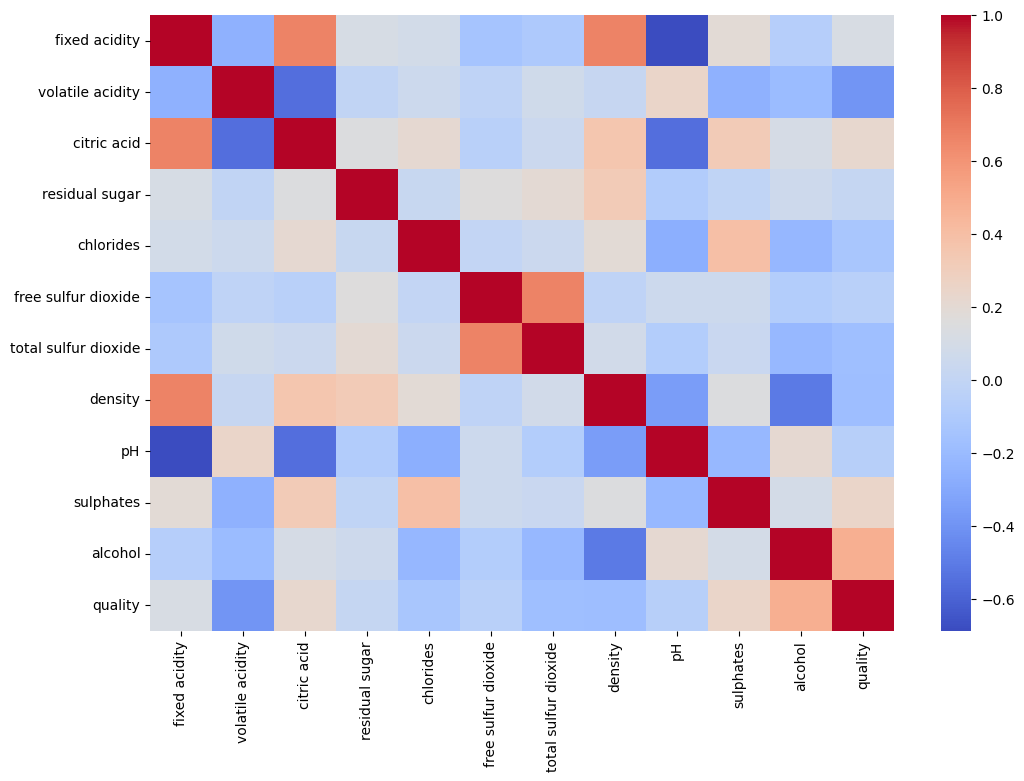

In [18]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.show()


## One sample T-Test

Is the mean alcohol content different from 10%?

In [23]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(df["alcohol"], 10)
print("T-statistic:", t)
print("P-value:", p)
if p > 0.05:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")



T-statistic: 14.7284461919697
P-value: 1.156101460255058e-45
reject null hypothesis


## Independent T-test

Do high-quality and low-quality wines differ in alcohol %?

In [22]:
high = df[df["quality"] >= 7]["alcohol"]
low  = df[df["quality"] <= 5]["alcohol"]

from scipy.stats import ttest_ind

t, p = ttest_ind(high, low, equal_var=False)
print("T-statistic:", t)
print("P-value:", p)
if p > 0.05:
    print("accept null hypothesis")
else:
    print("reject null hypothesis") 

T-statistic: 20.23684193979847
P-value: 2.1275602594128367e-54
reject null hypothesis


## ANOVA test



In [24]:
from scipy.stats import f_oneway

groups = [grp["alcohol"] for name, grp in df.groupby("quality")]
f, p = f_oneway(*groups)
print("F-statistic:", f)
print("P-value:", p)

if p > 0.05:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

F-statistic: 103.43784860355012
P-value: 1.515334674301239e-92
reject null hypothesis


In [26]:
from scipy.stats import pearsonr

corr, p = pearsonr(df["alcohol"], df["quality"])
print("Correlation coefficient:", corr)
print("P-value:", p)


Correlation coefficient: 0.4803428980019915
P-value: 2.278721132541171e-79


## Chi-Square Test

In [27]:
df["quality_label"] = df["quality"].apply(
    lambda x: "good" if x >= 7 else ("average" if x == 6 else "bad")
)
df["alcohol_level"] = pd.cut(df["alcohol"],
                             bins=[0, 9, 11, 14],
                             labels=["low", "medium", "high"])
import scipy.stats as stats

table = pd.crosstab(df["quality_label"], df["alcohol_level"])
chi, p, dof, exp = stats.chi2_contingency(table)
print(chi, p)
alpha = 0.05
print("Reject H0" if p < alpha else "Fail to reject H0")



280.46491633264844 1.7690974347598897e-59
Reject H0
